In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from os import chdir
import os
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = Path('dane_sezony')
chdir(path)
print("Current dir: %s" % (Path.cwd()))
print("Home dir: %s" % (Path.home()))

filedir = Path.cwd()

Current dir: /home/wojciech/MGR/dane_sezony
Home dir: /home/wojciech


In [3]:
files = [e for e in filedir.iterdir() if e.is_file()]
files.sort(key=os.path.getmtime)
print(files[0],"\n",files[-1])

/home/wojciech/MGR/dane_sezony/E56.csv 
 /home/wojciech/MGR/dane_sezony/E1819.csv


In [4]:
concatenated = []
for file in files:
    df = pd.read_csv(file, index_col=None, header=0)
    print("stara data: ", df['Date'][0])
    print("pd to datetime: ", pd.to_datetime(df['Date'])[0])
    concatenated.append(df)

stara data:  13/08/05
pd to datetime:  2005-08-13 00:00:00
stara data:  19/08/06
pd to datetime:  2006-08-19 00:00:00
stara data:  11/08/07
pd to datetime:  2007-11-08 00:00:00
stara data:  16/08/08
pd to datetime:  2008-08-16 00:00:00
stara data:  15/08/09
pd to datetime:  2009-08-15 00:00:00
stara data:  14/08/10
pd to datetime:  2010-08-14 00:00:00
stara data:  18/08/12
pd to datetime:  2012-08-18 00:00:00
stara data:  17/08/13
pd to datetime:  2013-08-17 00:00:00
stara data:  16/08/14
pd to datetime:  2014-08-16 00:00:00
stara data:  08/08/15
pd to datetime:  2015-08-08 00:00:00
stara data:  13/08/16
pd to datetime:  2016-08-13 00:00:00
stara data:  11/08/2017
pd to datetime:  2017-11-08 00:00:00
stara data:  10/08/2018
pd to datetime:  2018-10-08 00:00:00


In [5]:
for x in concatenated:
    if len(x.iloc[5]['Date'].split("/")[2]) > 2:
        x['Date'] = pd.to_datetime(x['Date'],format='%d/%m/%Y')
    else:
        x['Date'] = pd.to_datetime(x['Date'],format='%d/%m/%y')

In [6]:
df_to_map = pd.concat(concatenated)
df_to_map.to_csv(str(Path.cwd().parent)+'/to_map.csv',index=False)

In [7]:
vals_df = pd.read_csv(str(Path.cwd().parent)+'/values.csv')


In [8]:
def add_value(single_databases):
    for dframe in single_databases:
        dframe['HV'] = dframe['HomeTeam']
        dframe['AV'] = dframe['AwayTeam']
        to_map = (vals_df[vals_df['Season'] == dframe['Date'][0].year])
        to_map_dt = dict(zip(to_map['Team'], to_map['Value']))
        dframe['HV'] = dframe['HV'].map(to_map_dt)
        dframe['AV'] = dframe['AV'].map(to_map_dt)

In [9]:
add_value(concatenated)

In [10]:
df = pd.concat(concatenated)

In [11]:
df.dropna(axis=1, inplace=True)
df.drop(['Div', 'HTHG', 'HTAG','HTR'],axis=1, inplace=True)

In [12]:
df.sort_values(['Date'],inplace=True)

In [13]:
df.reset_index(drop=True, inplace=True)

# kody zmiennych:

In [14]:
p = {'Date': 'Data',
'HomeTeam': 'Gospodarze',
'AwayTeam': 'Goście',
'FTHG': 'Gole zdobyte przez gospodarzy',
'FTAG': 'Gole zdobyte przez gości',
'FTR': 'Rezultat',
'Referee': 'Sędzia',
'HS': 'Strzały gospodarzy',
'AS': 'Strzały gości',
'HST': 'Celne strzały gospodarzy',
'AST': 'Celne strzały gości',
'HC': 'Rzuty rożne gospodarzy',
'AC': 'Rzuty rożne gości',
'HF': 'Faule spowodowane przez gospodarzy',
'AF': 'Faule spowodowane przez gości',
'HY': 'Żółte kartki gospodarzy',
'AY': 'Żółte kartki gości',
'HR': 'Czerwone kartki gospodarzy',
'AR': 'Czerwone kartki gości',
'HV': 'Wartość rynkowa drużyny gospodarzy',
'AV': 'Wartość rynkowa drużyny gości'}

Dane zostały zaczerpnięte ze strony "https://www.football-data.co.uk/" oraz https://www.transfermarkt.pl/. Pierwsza strona internetowa kolekcjonuje oraz udostępnia podstawowe statystyki dotyczące meczów popularniejszych lig piłkarskich. Druga strona internetowa zajmuje się wyceną klubów oraz zawodników. Zakres danych to 13 sezonów rozgrywek English Premier League w latach 2005-2019. Tabela ma rozmiar 4940 x 19. Osiemnaście kolumn (wszystkie prócz "Rezultat") to zmienne objaśniające.

In [15]:
for key, value in p.items():
    print("\nZmienna: [%s] oznacza --> [%s]" %(key, value))


Zmienna: [Date] oznacza --> [Data]

Zmienna: [HomeTeam] oznacza --> [Gospodarze]

Zmienna: [AwayTeam] oznacza --> [Goście]

Zmienna: [FTHG] oznacza --> [Gole zdobyte przez gospodarzy]

Zmienna: [FTAG] oznacza --> [Gole zdobyte przez gości]

Zmienna: [FTR] oznacza --> [Rezultat]

Zmienna: [Referee] oznacza --> [Sędzia]

Zmienna: [HS] oznacza --> [Strzały gospodarzy]

Zmienna: [AS] oznacza --> [Strzały gości]

Zmienna: [HST] oznacza --> [Celne strzały gospodarzy]

Zmienna: [AST] oznacza --> [Celne strzały gości]

Zmienna: [HC] oznacza --> [Rzuty rożne gospodarzy]

Zmienna: [AC] oznacza --> [Rzuty rożne gości]

Zmienna: [HF] oznacza --> [Faule spowodowane przez gospodarzy]

Zmienna: [AF] oznacza --> [Faule spowodowane przez gości]

Zmienna: [HY] oznacza --> [Żółte kartki gospodarzy]

Zmienna: [AY] oznacza --> [Żółte kartki gości]

Zmienna: [HR] oznacza --> [Czerwone kartki gospodarzy]

Zmienna: [AR] oznacza --> [Czerwone kartki gości]

Zmienna: [HV] oznacza --> [Wartość rynkowa drużyny g

# Struktura rezultatów 

In [16]:
from collections import Counter

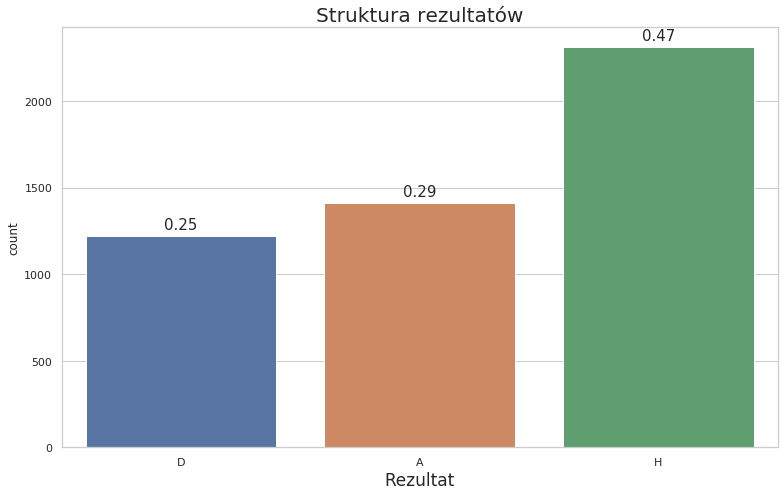

In [17]:
total = len(df['FTR'])

plt.figure(figsize=(11,7))
results = sns.countplot(x='FTR', data=df)
plt.title("Struktura rezultatów", fontsize=20)
plt.xlabel("Rezultat", fontsize=17)
for p in results.patches:
    height = p.get_height()
    results.text(p.get_x() + p.get_width()/2.,
                height + 40,
                '{:1.2f}'.format(height/total),
                ha='center', fontsize=15)
plt.tight_layout()

Powyższy wykres przedstawia strukturę rezultatów meczów piłkarskich. Można zauważyć, że prawie połowa z rozgrywanych meczów to zwycięstwo gospodarza. Wygrana lub remis gościa zdarza się z mniej więcej tą samą częstotliwością.

# Liczba meczów rozegranych przez daną drużynę 

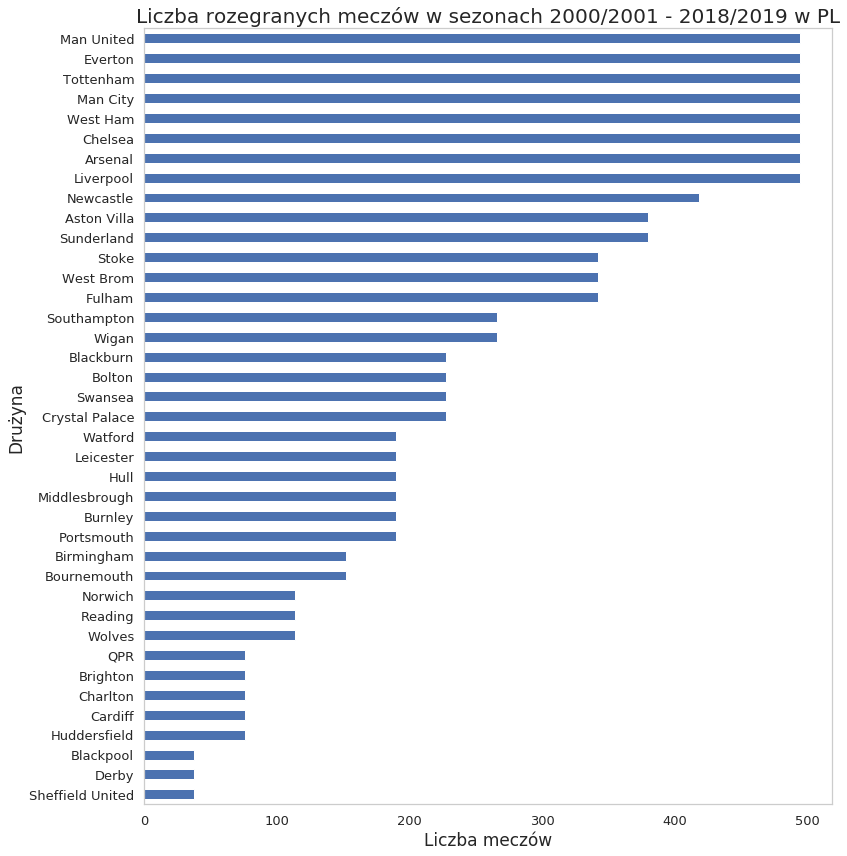

In [18]:
teams_cnt = pd.Series((Counter(df['HomeTeam']) + Counter(df['AwayTeam'])))
teams_cnt.sort_values(ascending=True, inplace=True)
teams_cnt.plot.barh(figsize=(12,12), grid=False, fontsize=13)
plt.title("Liczba rozegranych meczów w sezonach 2000/2001 - 2018/2019 w PL", fontsize=20)
plt.xlabel("Liczba meczów", fontsize=17)
plt.ylabel("Drużyna",fontsize=17)
plt.tight_layout()

Wykres przedstawia ilość meczów drużyny w English Premier League. Osiem klubów nieprzerwanie gra na najwyższym poziomie rozgrywek. Zdarzają się również kluby, które tylko raz zawitały w elitarnej klasie rozgrywek.

# Ilość zdobytych bramek

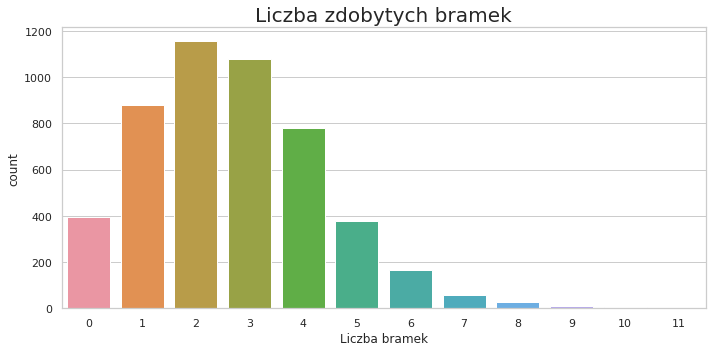

In [19]:
gs = pd.Series(df['FTHG'] + df['FTAG'])
plt.figure(figsize=(10,5))
plt.title("Liczba zdobytych bramek", fontsize=20)
plt.xlabel("Liczba bramek")
sns.countplot(gs)
plt.tight_layout()

Z wykresu wynika, że najczęściej spotykaną liczbą bramek w jednym meczu to dwie lub trzy. Wynik 0-0 jest średnio spotykany. W badanym szeregu czasowym, maksymalna liczba bramek jaka padła to 11. Wydarzyło się to 2007-09-29 w meczu Portsmouth - Reading. Gospodarze zwyciężyli wówczas 7-4.

# Liczba strzałów

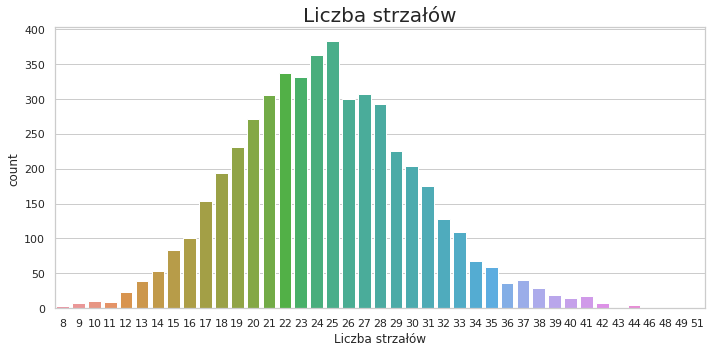

In [20]:
gs = pd.Series(df['HS'] + df['AS'])
plt.figure(figsize=(10,5))
plt.title("Liczba strzałów", fontsize=20)
plt.xlabel("Liczba strzałów")
sns.countplot(gs)
plt.tight_layout()

Wykres przedstawia sumę strzałów w pojedynczym meczu. Z wizualizacji wynika, że najczęściej pada mniej więcej 25 strzałów na mecz. Można zauważyć bardzo duże podobieństwo do rozkładu normalnego. Za pomocą poniższego kodu wykonano test Shapiro-Wilka:

In [21]:
from scipy import stats
np.random.seed(12345)
x = pd.Series(df['HS'] + df['AS'])
s = stats.shapiro(x)
print("H0: Próba pochodzi z populacji o rozkładzie normalnym")
print("H1: Próba nie pochodzi z populacji o rozkładzie normalnym")
print("Statystyka testowa: %.3f \nWartość p: %.3f" % (s[0], s[1]))
if s[1]<0.05:
    print("H0 zostało odrzucone")
else:
    print("Nie ma podstaw do odrzucenia H0")

H0: Próba pochodzi z populacji o rozkładzie normalnym
H1: Próba nie pochodzi z populacji o rozkładzie normalnym
Statystyka testowa: 0.992 
Wartość p: 0.000
H0 zostało odrzucone


# Czy większa liczba strzałów powoduje zdobywanie więcej goli ?

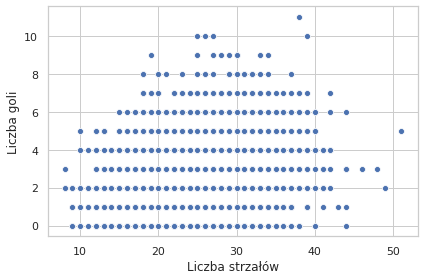

In [22]:
gs_to_sh = pd.DataFrame([df['FTHG'] + df['FTAG'],df['HS'] + df['AS']],
                        index=['Bramki', 'Strzały']).T
sns.scatterplot(y='Bramki', x='Strzały',data=gs_to_sh)
plt.ylabel("Liczba goli")
plt.xlabel("Liczba strzałów")
plt.tight_layout()

Powyższy wykres na osi x prezentuje liczbę strzałów w danym meczu, a na osi y liczbę goli w danym meczu. Zamierzono odczytać wysoką zależność między ilością strzałów a ilością bramek, niestety nie można jednoznacznie tego ocenić. Poniżej sprawdzono korelację pomiędzy dwoma badanymi cechami:

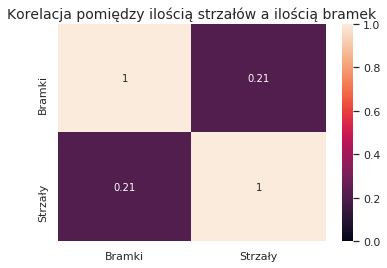

In [23]:
plt.tight_layout()
corr = gs_to_sh.corr()
sns.heatmap(corr, vmin=0, vmax=1.0, annot=True)
plt.title("Korelacja pomiędzy ilością strzałów a ilością bramek", fontsize=14)

plt.show()

Do zobrazowania korelacji wykonano wykres w postaci heatmap. Zbadano korelację między dwoma zmiennymi. Z obliczeń wynika, że korelacja między ilością strzałów a ilością bramek wynosi około 0.21. Jest to niemała ciekawostka, ponieważ w świecie futbolu przyjęto że im bardziej dana drużyna napiera na bramkę przeciwnika i w efekcie oddaje strzały na bramkę, tym więcej zdobywa goli.

# Kto ma najwyższą średnią bramek na mecz?

Średnia liczba bramek na mecz: 1.19
Odchylenie standardowe bramek na mecz: 0.33


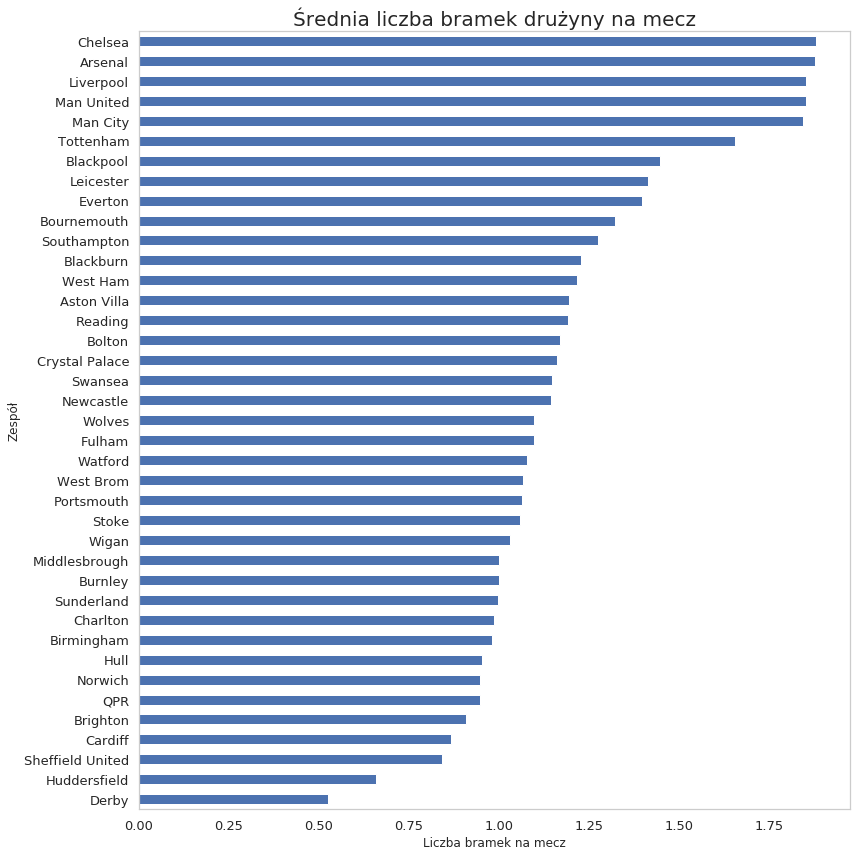

In [24]:
gbt = pd.Series(df['FTHG'].groupby(df['HomeTeam']).mean() + df['FTAG'].groupby(df['AwayTeam']).mean())/2
gbt.sort_values(ascending=True, inplace=True)
plt.figure(figsize=(10,5))
plt.title("Średnia liczba bramek drużyny na mecz", fontsize=20)
plt.xlabel("Liczba bramek na mecz")
gbt.plot.barh(figsize=(12,12), grid=False, fontsize=13)
plt.ylabel("Zespół")
plt.tight_layout()

gs_avg = gbt.mean()
gs_std = gbt.std()
print('Średnia liczba bramek na mecz: %.2f' % (gs_avg))
print('Odchylenie standardowe bramek na mecz: %.2f' % (gs_std))

Na wykresie przedstawiono średnią liczbę bramek na mecz zdobywaną przez każdy zespół. Zgodnie z oczekiwaniami, na czele tabeli można zauważyć topowe zespoły z English Premier League. Ogólna średnia ligi wynosi 1.19 bramki na mecz przy odchyleniu standardowym 0.33.

# Średnia liczba strzałów na mecz

Średnia liczba strzałów na mecz: 11.59


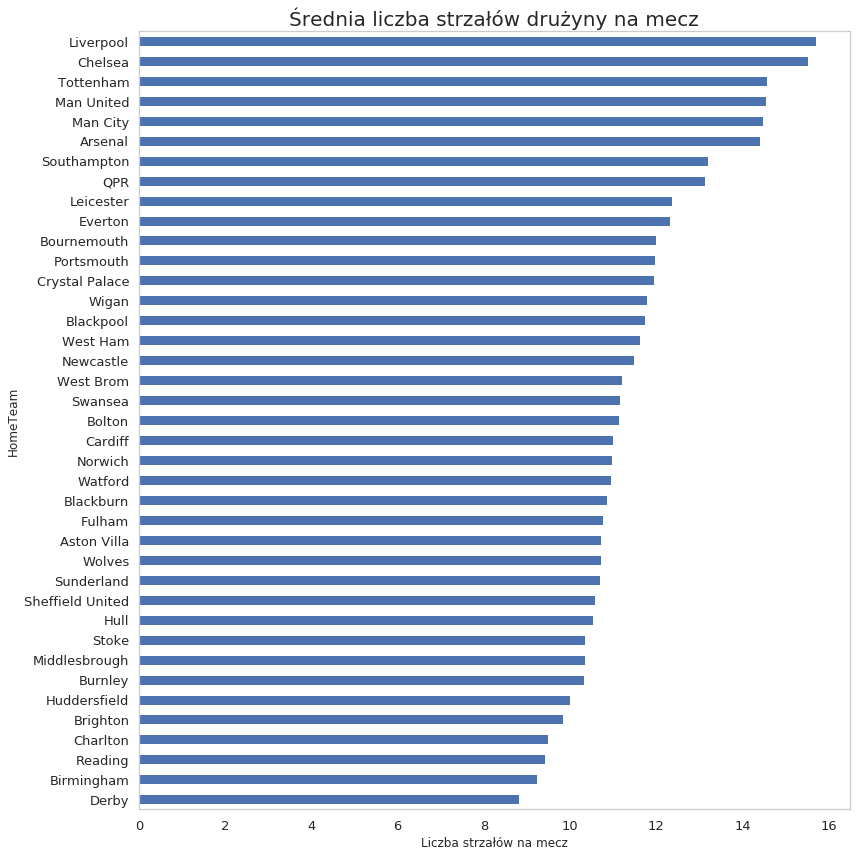

In [25]:
gst = pd.Series(df['HS'].groupby(df['HomeTeam']).mean() + df['AS'].groupby(df['AwayTeam']).mean())/2
gst.sort_values(ascending=True, inplace=True)
plt.figure(figsize=(10,5))
plt.title("Średnia liczba strzałów drużyny na mecz", fontsize=20)
plt.xlabel("Liczba strzałów na mecz")
gst.plot.barh(figsize=(12,12), grid=False, fontsize=13)
plt.tight_layout()

sh_avg = gst.mean()
print('Średnia liczba strzałów na mecz: %.2f' % (sh_avg))

Z powyższego wykresu wynika, że w angielskiej najwyższej klasie rozgrywkowej średnia liczba strzałów wynosi 11.59. W czołówce tabeli ponownie można zauważyć topowe, znane zespoły. 

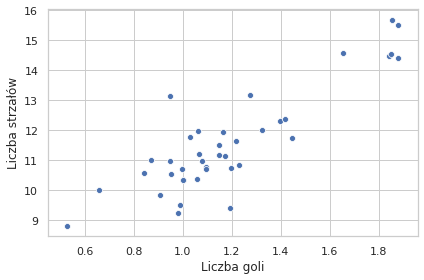

In [26]:
sns.scatterplot(y=gst, x=gbt)
plt.xlabel("Liczba goli")
plt.ylabel("Liczba strzałów")
plt.tight_layout()

Wykres przedstawia średnią liczbę strzałów skonfrontowaną ze średnią liczbą goli. Wygląda na to, że jeżeli zespół średnio wykonuje więcej strzałów, to również średnio zdobywa więcej bramek. Odwołując się do wcześniejszego wykresu, podczas jednego meczu nie występuje korelacja między strzałami a bramkami, jednak średnie z całego okresu ukazują że może wystąpić korelacja pomiędzy tymi dwoma cechami.

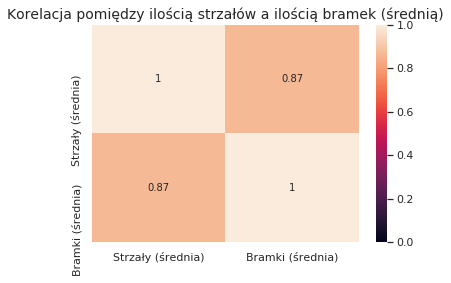

In [27]:
plt.tight_layout()
corr = pd.DataFrame({'Strzały (średnia)':gst, 'Bramki (średnia)':gbt}).corr()
sns.heatmap(corr, vmin=0, vmax=1, annot=True)
plt.title("Korelacja pomiędzy ilością strzałów a ilością bramek (średnią)", fontsize=14)

plt.show()

Wykres korelacji pokazuje silną zależność między średnią ilością strzałów a średnią ilością bramek. Korelacja wynosi około 0.87. Można przyjąć tezę, że jeżeli zespół za ogólny cel przyjmie wysoką ilość strzałów, to może liczyć się z tym że zdobędzie średnio więcej bramek niż jego przeciwnicy.

### Czy zespół który zdobywa więcej bramek, równie dużo ich traci?

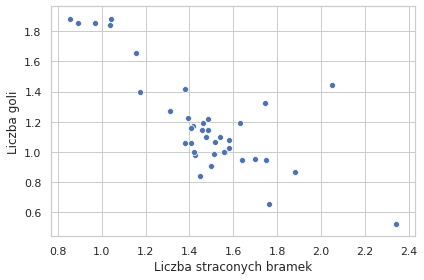

In [28]:
gl= pd.Series(df['FTHG'].groupby(df['AwayTeam']).mean() + df['FTAG'].groupby(df['HomeTeam']).mean())/2
sns.scatterplot(x=gl,y=gbt)
plt.ylabel("Liczba goli")
plt.xlabel("Liczba straconych bramek")
plt.tight_layout()

Na powyższym wykresie można zauważyć, że zespoły które średnio zdobywają więcej bramek, mniej pozwalają sobie strzelić.

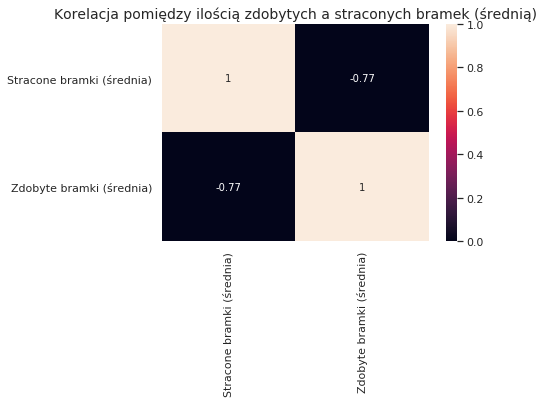

In [29]:
#plt.figure(figsize=(9,6))
plt.tight_layout()
corr = pd.DataFrame({'Stracone bramki (średnia)':gl, 'Zdobyte bramki (średnia)':gbt}).corr()
sns.heatmap(corr, vmin=0, vmax=1, annot=True)
plt.title("Korelacja pomiędzy ilością zdobytych a straconych bramek (średnią)", fontsize=14)

plt.show()

Wynik korelacji pomiędzy średnimi straconymi a zdobytymi bramkami wynosi -0.77 więc jest silnie ujemny. Oznacza to potwierdzenie wcześniejszej tezy, że zespoły które średnio strzelają więcej bramek, mniej ich tracą na rzecz przeciwnika.

# Więcej goli u siebie czy na wyjeździe ?

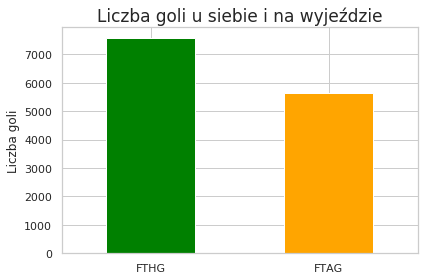

In [30]:
data = df[['FTHG','FTAG']].sum()
data.plot.bar(color=['green', 'orange'])
plt.xticks(rotation=0)
plt.ylabel("Liczba goli")
plt.title("Liczba goli u siebie i na wyjeździe", fontsize=17)
plt.tight_layout()

Wykres przedstawia ilość zdobytych goli przez gospodarzy i gości. Można zauważyć dosyć znaczną przewagę w bramkach zdobywanych na własnym stadionie, co może być powodem tzw. "przewagi własnego boiska".

# Która drużyna skuteczniej wykorzystuje strzały?

Średnia skuteczność strzałów: 0.10


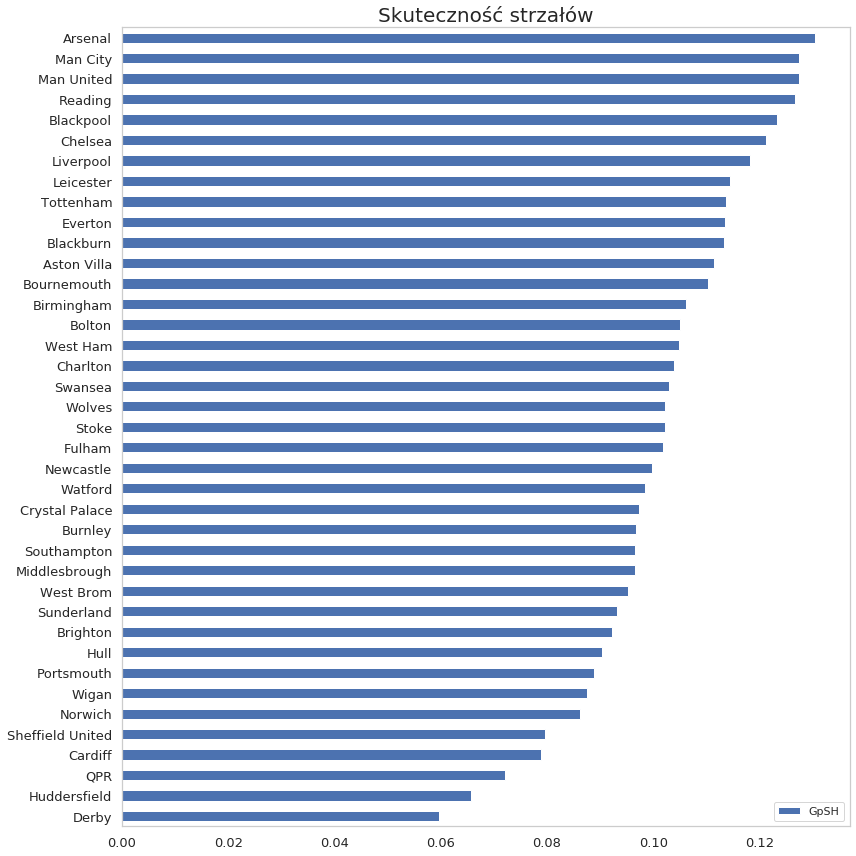

In [31]:
gs = pd.Series(df["FTHG"].groupby(df['HomeTeam']).sum()+df["FTAG"].groupby(df['AwayTeam']).sum())
shoots = pd.Series(df["HS"].groupby(df['HomeTeam']).sum()+df["AS"].groupby(df['AwayTeam']).sum())
d = {'GpSH': gs/shoots}
eff = pd.DataFrame(d, index=np.unique(df['HomeTeam']))
eff.sort_values(['GpSH'],inplace=True)

eff.plot.barh(figsize=(12,12), grid=False, fontsize=13)
plt.title("Skuteczność strzałów", fontsize=20)
plt.tight_layout()

sh_avg = (gs/shoots).mean()
print('Średnia skuteczność strzałów: %.2f' % (sh_avg))

Na powyższym wykresie przedstawiono średnią skuteczność strzałów danej drużyny. Średnia skuteczność wynosi 0.1, co oznacza że średnio co dziesiąty strzał skutkuje bramką. Ponownie w czołówce można zauważyć topowe drużyny English Premier League, co może oznaczać po prostu lepiej wyszkolonych technicznie zawodników lub skuteczniejszą taktykę meczową. Pomiędzy najskuteczniejszymi drużynami znajduje się również zespół Reading (przeważne z dolnej części tabeli), podczas gdy średnia liczba strzałów tej drużyny jest jedną z najniższych. Może to oznaczać mocno defensywną taktykę drużyny.

# Czy ilość rzutów rożnych ma wpływ na liczbę zdobytych bramek?

Średnia liczba rzutów rożnych na mecz: 10.83


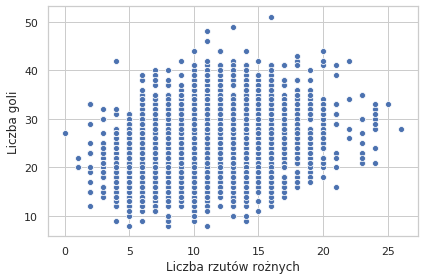

In [32]:
c_to_sh = pd.DataFrame([df['HC'] + df['AC'],df['HS'] + df['AS']],
                        index=['C', 'SH']).T
sns.scatterplot(x='C', y='SH',data=c_to_sh)
plt.ylabel("Liczba goli")
plt.xlabel("Liczba rzutów rożnych")
plt.tight_layout()

c_avg = (df['HC'] + df['AC']).mean()
print('Średnia liczba rzutów rożnych na mecz: %.2f' % (c_avg))

Bardzo podobna sytuacja do wcześniejszego wykresu ze skonfrontowanymi strzałami i zdobytymi bramkami. Nie można ocenić jednoznacznie, czy podczas gdy liczba rzutów rożnych podczas meczu rośnie, zwiększa się również bilans bramkowy. Średnia rzutów rożnych na mecz to 10.83.

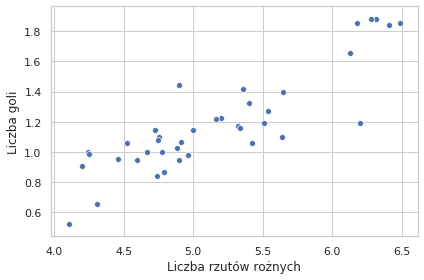

In [33]:
gc = pd.Series(df['HC'].groupby(df['HomeTeam']).mean() + df['AC'].groupby(df['AwayTeam']).mean())/2
sns.scatterplot(x=gc,y=gbt)
plt.ylabel("Liczba goli")
plt.xlabel("Liczba rzutów rożnych")
plt.tight_layout()

Doskonale widać na powyższym wykresie, że drużyny które średnio strzelają więcej bramek, wypracowują sobie średnio więcej rzutów rożnych.

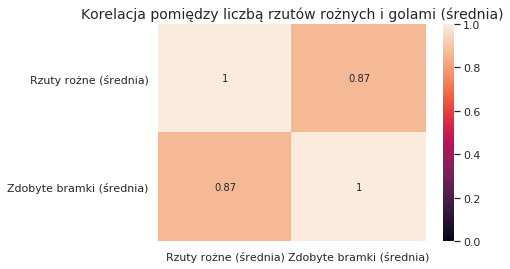

In [34]:
#plt.figure(figsize=(9,6))
plt.tight_layout()
corr = pd.DataFrame({'Rzuty rożne (średnia)':gc, 'Zdobyte bramki (średnia)':gbt}).corr()
sns.heatmap(corr, vmin=0, vmax=1, annot=True)
plt.title("Korelacja pomiędzy liczbą rzutów rożnych i golami (średnia)", fontsize=14)
plt.show()

Występuje silna korelacja (0.87) pomiędzy średnią liczbą bramek oraz średnią liczbą rzutów rożnych. Ten wynik, jak i wcześniejsze silne korelacje, mogą być spowodowane prostą przyczyną - drużyny które na ogół grają lepiej, wypracowują sobie więcej szans na zdobycie bramek, więc analogiczne wykonują również więcej strzałów, a jeśli jest wiecej strzałów / sytuacji podbramkowych, część z niewykorzystanych sytuacji zamienia się w rzut rożny.

# Najbardziej agresywna drużyna (napomnienia i wykluczenia)

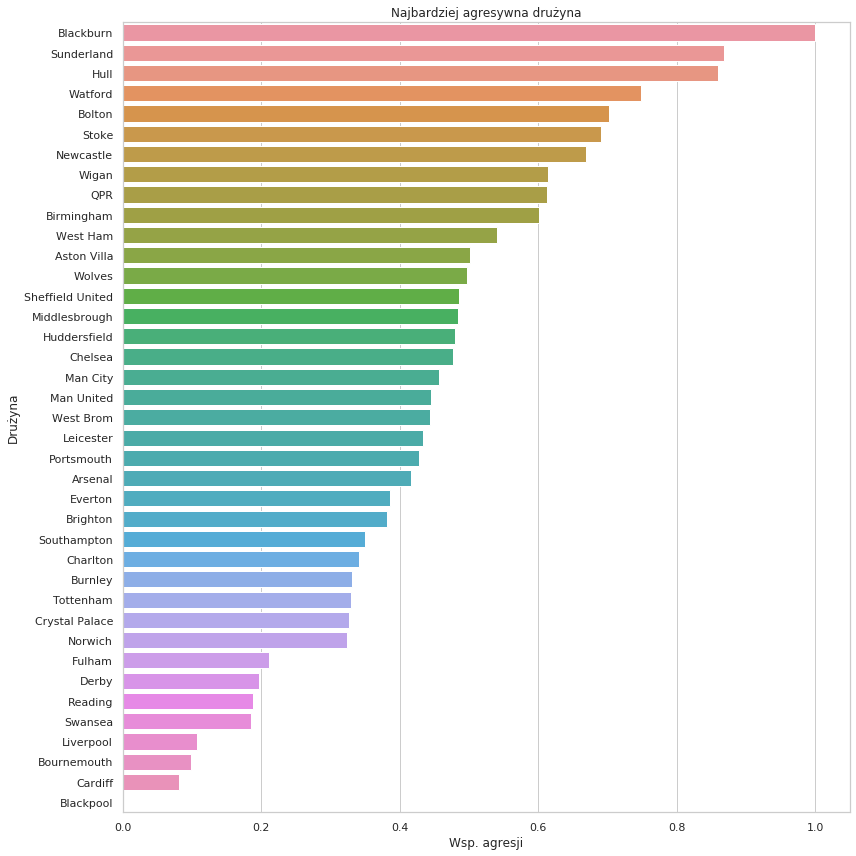

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

yc = (df["HY"].groupby(df['HomeTeam']).mean()+df["AY"].groupby(df['AwayTeam']).mean()) /2
rc = (df["HR"].groupby(df['HomeTeam']).mean()+df["AR"].groupby(df['AwayTeam']).mean()) /2

cards = pd.DataFrame({'Y':yc, 'R':rc})
sc_cards = sc.fit_transform(cards)
cards_index = sc.fit_transform((np.sum(sc_cards, axis=1)).reshape(-1,1))
cards_df = pd.DataFrame({'aggression':np.ravel(cards_index)}, index=cards.index)
cards_df.sort_values('aggression',ascending=False,inplace=True)
plt.figure(figsize=(12,12))
sns.barplot(y=cards_df.index, x=cards_df['aggression'], orient='h')
plt.xlabel('Wsp. agresji')
plt.ylabel("Drużyna")
plt.title('Najbardziej agresywna drużyna')
plt.tight_layout()

Współczynnik agresji został obliczony na podstawie ilości napomnień oraz wykluczeń w danej drużynie. Dane zostały poddane normalizacji. Struktura wskaźnika jest następująca: 50% oceny współczynnika to średnia ilość żółtych kartek, a pozostałe 50% to średnia ilość czerwonych kartek. Z wykresu wynika że najbardziej agresywnymi drużynami są te zespoły, które raczej zajmują dolną część tabeli. Może to wynikać z faktu że podczas meczu są nastawione defensywnie oraz popełniają faule w groźniejszej części boiska, za co zawodnicy tego zespołu są karani.

# Średnia faulów na mecz 

Średnia faulów na mecz: 11.44
Odchylenie standardowe faulów na mecz: 0.99


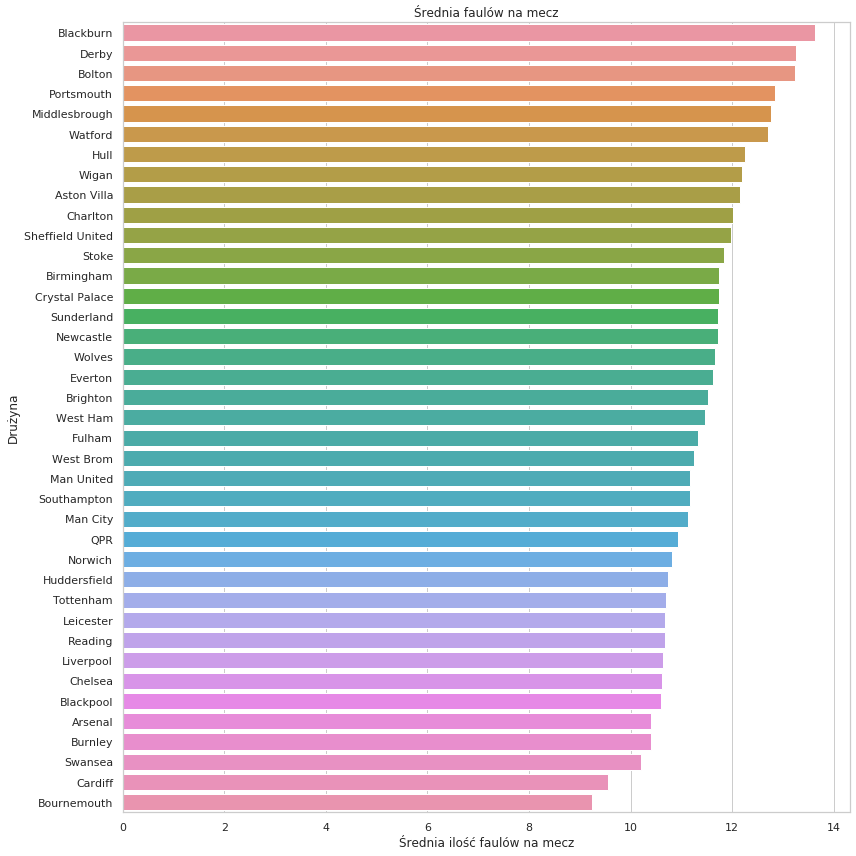

In [36]:
fouls = {'F':(df['HF'].groupby(df['HomeTeam']).mean() + df['AF'].groupby(df['AwayTeam']).mean())/2}
f = pd.DataFrame(fouls)
f.sort_values('F', ascending=False, inplace=True)

plt.figure(figsize=(12,12))
sns.barplot(y=f.index, x=f['F'], orient='h')
plt.xlabel('Średnia ilość faulów na mecz')
plt.ylabel("Drużyna")
plt.title('Średnia faulów na mecz')
plt.tight_layout()

print('Średnia faulów na mecz: %.2f' % (f['F'].mean()))
print('Odchylenie standardowe faulów na mecz: %.2f' % (f['F'].std()))

Powyższy wykres przedstawia klasyfikację drużyn ze względu na średnią ilość popełnionych faulów w czasie meczu. Średnia wynosi 11.44 przy odchyleniu standardowym 0.99, więc można powiedzieć że drużyny dokonują w miarę tyle samo faulów.

# Jakie były różnice w wartościach drużyn na przestrzeni lat?

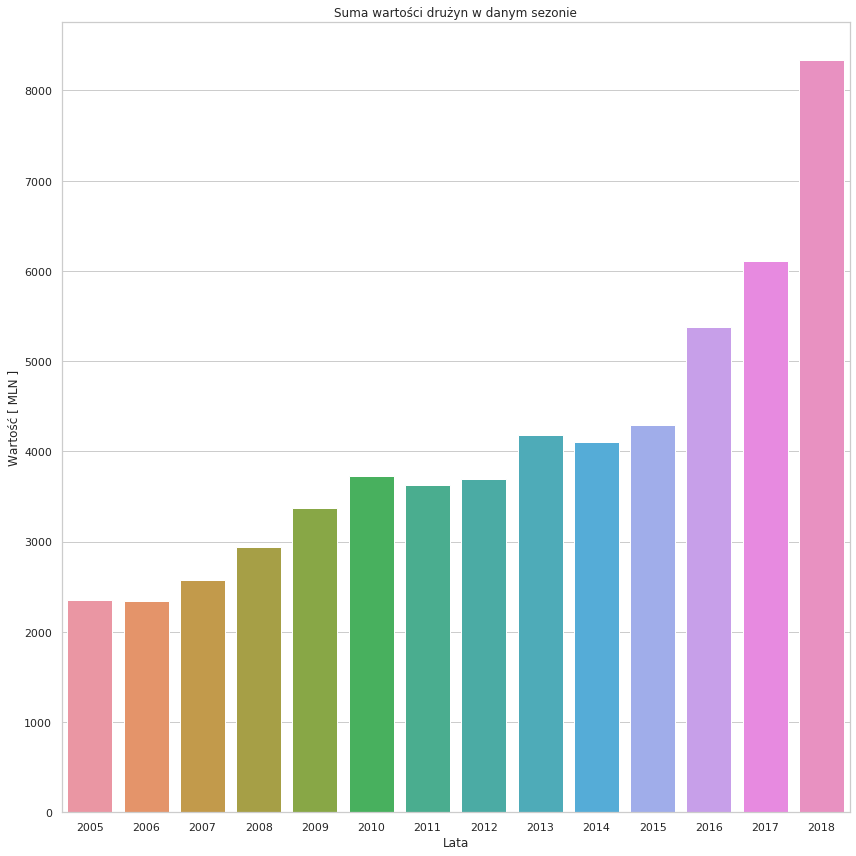

In [37]:
vals = vals_df.groupby('Season').sum()

plt.figure(figsize=(12,12))
sns.barplot(y=vals['Value'], x=vals.index)
plt.xlabel('Lata')
plt.ylabel("Wartość [ MLN ]")
plt.title('Suma wartości drużyn w danym sezonie')
plt.tight_layout()

Ostatni wykres przedstawia wartości rynkowe drużyn na przestrzeni lat uwzględnionych w badaniu. Już na pierwszy rzut oka można zauważyć, że wartości klubów piłkarskich przez 13 sezonów wzrosły średnio czterokrotnie.

### *------------------------------------------------------ Przetwarzanie danych ------------------------------------------------------*

In [38]:
df.drop(columns=['Referee','Date'],inplace=True)

In [39]:
df.to_csv(str(Path.cwd().parent) + '/merged.csv', index=False)

In [40]:
home_dict = {'H':3, 'D':1, 'A':0}
away_dict = {'H':0, 'D':1, 'A':3}

df["HP"] = df['FTR'].map(home_dict)
df["AP"] = df['FTR'].map(away_dict)

In [41]:
cols = df.drop(columns=['HomeTeam','AwayTeam','FTR','HV','AV']).columns

In [42]:
ha = ['HomeTeam', 'AwayTeam']
gsha = ['FTHG', 'FTAG']

In [43]:
class Form():
    
    def __init__(self,home_away_c , get_form_cols, database):
        self.col_names = database.columns
        self.form_df = database.copy()
        self.home_away_c = home_away_c
        self.get_form_cols = get_form_cols
        self.teams = np.unique(self.form_df[home_away_c[0]])
        
    def get_pairs(self):
        a = []
        for i in range(0,len(self.get_form_cols),2):
            a.append(self.get_form_cols[i:i+2])
        self.get_form_cols = np.array(a)
        
    def get_form(self, rolling_int=1):
        for col in self.get_form_cols:
            for t, g in zip(self.home_away_c,col):
                form = []
                for team in self.teams:
                    new_df = self.form_df[self.form_df[t] == team]
                    #new_df = new_df[g].rolling(rolling_int).mean().shift(1)
                    new_df = new_df[g].expanding(5).mean().shift(1)
                    form.append(new_df)

                concat_form = pd.concat(form)
                self.form_df[g+'mean'] = concat_form
        return self.form_df.drop(self.col_names, axis=1)
    
    def get_mean(self):
        for col in self.get_form_cols:
            for t, g in zip(self.home_away_c,col):
                mean_dict = dict(self.form_df.groupby(t)[g].mean())
                self.form_df[g+'mean'] = self.form_df[t].map(mean_dict)
        return self.form_df.drop(self.col_names, axis=1)
    
    def shifting(self, shift_int=1):
        return self.form_df.shift(shift_int)

In [44]:
# srednia = Form(ha, cols, df)
# srednia.get_pairs()
# new_df = srednia.get_mean()
# new_df['Rezultat'] = df['FTR']
# new_df['HVmed'] = df['HomeTeam'].map(df.groupby('HomeTeam')['HV'].median())
# new_df['AVmed'] = df['AwayTeam'].map(df.groupby('AwayTeam')['AV'].median())
# # new_df['HVmed'] = df['HV']
# # new_df['AVmed'] = df['AV']
# new_df.dropna(inplace=True)

In [45]:
forma = Form(ha, cols, df)
forma.get_pairs()
new_df = forma.get_form(15)
new_df['Rezultat'] = df['FTR']
new_df['HVmed'] = df['HV']
new_df['AVmed'] = df['AV']
new_df.dropna(inplace=True)

In [46]:
new_df.columns

Index(['FTHGmean', 'FTAGmean', 'HSmean', 'ASmean', 'HSTmean', 'ASTmean',
       'HFmean', 'AFmean', 'HCmean', 'ACmean', 'HYmean', 'AYmean', 'HRmean',
       'ARmean', 'B365Hmean', 'B365Dmean', 'B365Amean', 'VCHmean', 'VCDmean',
       'VCAmean', 'Bb1X2mean', 'BbMxHmean', 'BbAvHmean', 'BbMxDmean',
       'BbAvDmean', 'BbMxAmean', 'BbAvAmean', 'BbOUmean', 'BbMx>2.5mean',
       'BbAv>2.5mean', 'BbMx<2.5mean', 'BbAv<2.5mean', 'HPmean', 'APmean',
       'Rezultat', 'HVmed', 'AVmed'],
      dtype='object')

In [47]:
new_df = new_df[['FTHGmean', 'FTAGmean', 'HSmean', 'ASmean', 'HSTmean', 'ASTmean',
       'HFmean', 'AFmean', 'HCmean', 'ACmean', 'HYmean', 'AYmean', 'HRmean',
       'ARmean', 'HVmed', 'AVmed',
       'HPmean', 'APmean', 'Rezultat']]

In [48]:
data = pd.DataFrame()
data['GS'] = new_df['FTHGmean'] - new_df['FTAGmean']
data['S'] = new_df['HSmean'] - new_df['ASmean']
data['ST'] = new_df['HSTmean'] - new_df['ASTmean']
data['C'] = new_df['HCmean'] - new_df['ACmean']
data['F'] = new_df['HFmean'] - new_df['AFmean']
data['Y'] = new_df['HYmean'] - new_df['AYmean']
data['R'] = new_df['HRmean'] - new_df['ARmean']
data['P'] = new_df['HPmean'] - new_df['APmean']
data['V'] = new_df['HVmed'] - new_df['AVmed']
data['Rezultat'] = new_df['Rezultat']

In [49]:
#new_df.to_csv(str(Path.cwd().parent) + '/final.csv', index=False)
data.to_csv(str(Path.cwd().parent) + '/final.csv', index=False)

In [50]:
# data = new_df

In [51]:
data['Rezultat'] = data['Rezultat'].map({'D':'A', 'H':'H', 'A':'A'})
data.to_csv(str(Path.cwd().parent) + '/finalHA.csv', index=False)